<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Goal" data-toc-modified-id="Goal-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#Initial-setup" data-toc-modified-id="Initial-setup-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Initial setup</a></span></li><li><span><a href="#Updating-the-FW_tol" data-toc-modified-id="Updating-the-FW_tol-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Updating the FW_tol</a></span><ul class="toc-item"><li><span><a href="#FW_tol-==-10**-6" data-toc-modified-id="FW_tol-==-10**-6-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>FW_tol == 10**-6</a></span></li><li><span><a href="#ni-to-10000" data-toc-modified-id="ni-to-10000-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>ni to 10000</a></span></li><li><span><a href="#Comparison-of-those-measures" data-toc-modified-id="Comparison-of-those-measures-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Comparison of those measures</a></span></li></ul></li><li><span><a href="#Change-the-initialization" data-toc-modified-id="Change-the-initialization-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Change the initialization</a></span></li></ul></div>

# Conclusion

# Goal

There are two main problems we have been dealing with: 
1. Computation time
2. The fact that the balance gets stuck

Here we want to work on the **first** one. Of course, both problems are deeply interlinked. 


There are two ways we can help this: 
- using the update factor
- leveraging properly the tolerances to speed up computation. 

We want to try **only the second approach here**. 

**NOTE**: here all the experiments will be run without the update factor, whose goal is only to speed up computation. This is going to come later. 

-----

We are going to play with the following parameters: 
- ni: to make sure we actually solve to the designated tolerance in the inner loop
- no: to make sure we have enough outside iterations
- FW_tol: to make sure we solve the problem to a given horizon

# Load

In [2]:
%load_ext autoreload
%autoreload 2
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os
import pandas as pd

from amod_ed.result_analysis import plot_ri, print_final_flows, plot_cost_all_path, plot_ri_list, plot_balance_list
from amod_ed.result_analysis import plot_stop_and_cost

In [4]:
subfolder='speeding_up'

# Initial setup

Here we solve as before, just to control and provide a good baseline

In [5]:
n_nodes=10

In [6]:
path='Data/'+str(n_nodes)+'Nodes/outputs/'+subfolder

In [7]:
print(os.listdir(path))

['initial_setup.pkl', 'output_L_10000_ni_10000_no_100_ev_0_relative_progress_fu_False.pkl']


In [8]:
filename=os.listdir(path)[0]
print(filename)

with open(os.path.join(path, filename), 'rb') as f:
        G_FW, OD, ri_FW, n_outer, n_inner, balance, opt_res, OD_list, balance_list, params = pickle.load(f)

initial_setup.pkl


In [9]:
params

{'L': 10000,
 'ni': 1000,
 'no': 20,
 'ev': False,
 'sc': 'relative_progress',
 'fu': False,
 'ri_smoothing': False,
 'update_factor': False,
 'FW_tol': 0,
 'tol': 0}

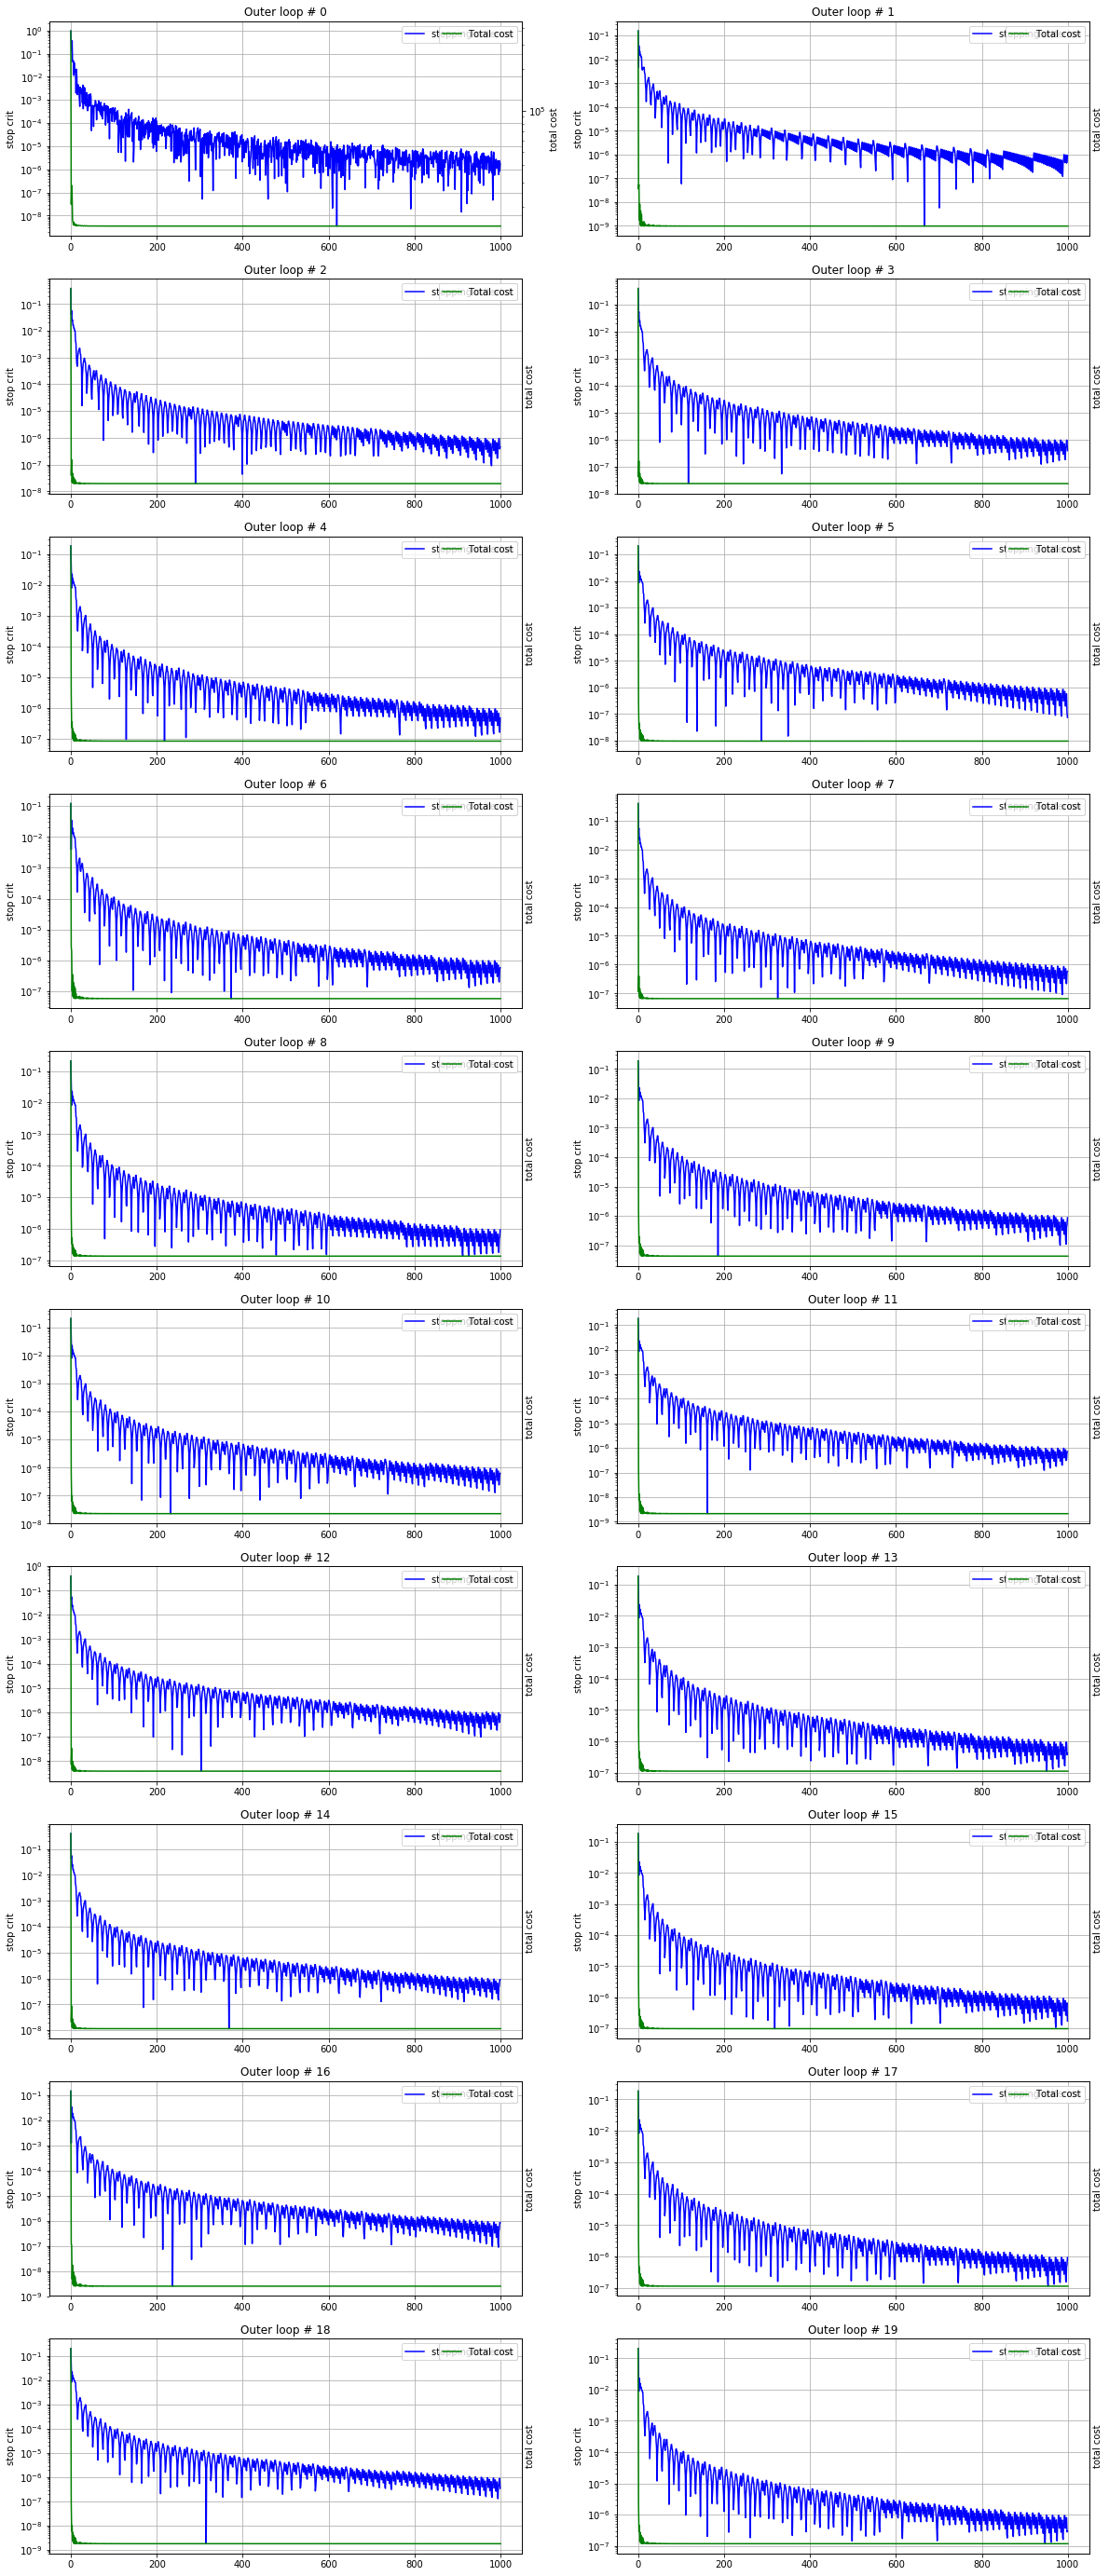

In [10]:
plot_stop_and_cost(opt_res)

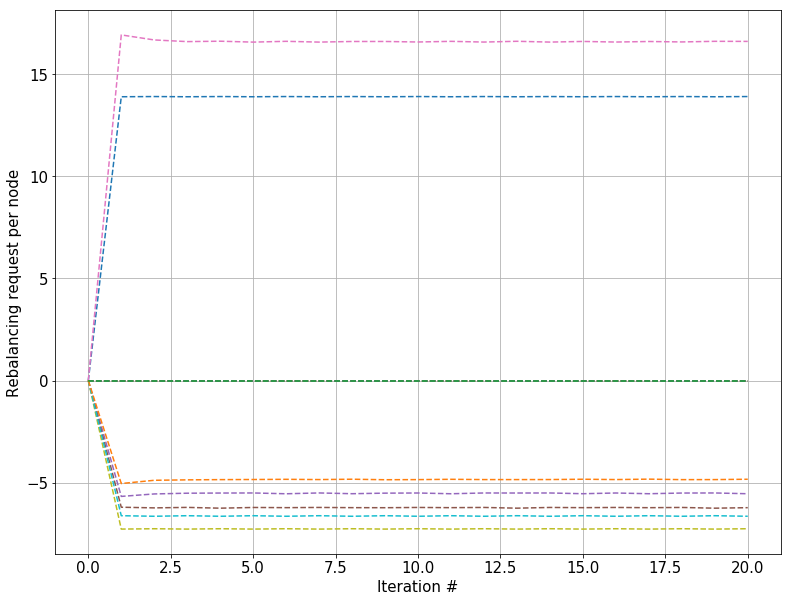

In [11]:
plot_ri_list(ri_FW, save = False, path = None)

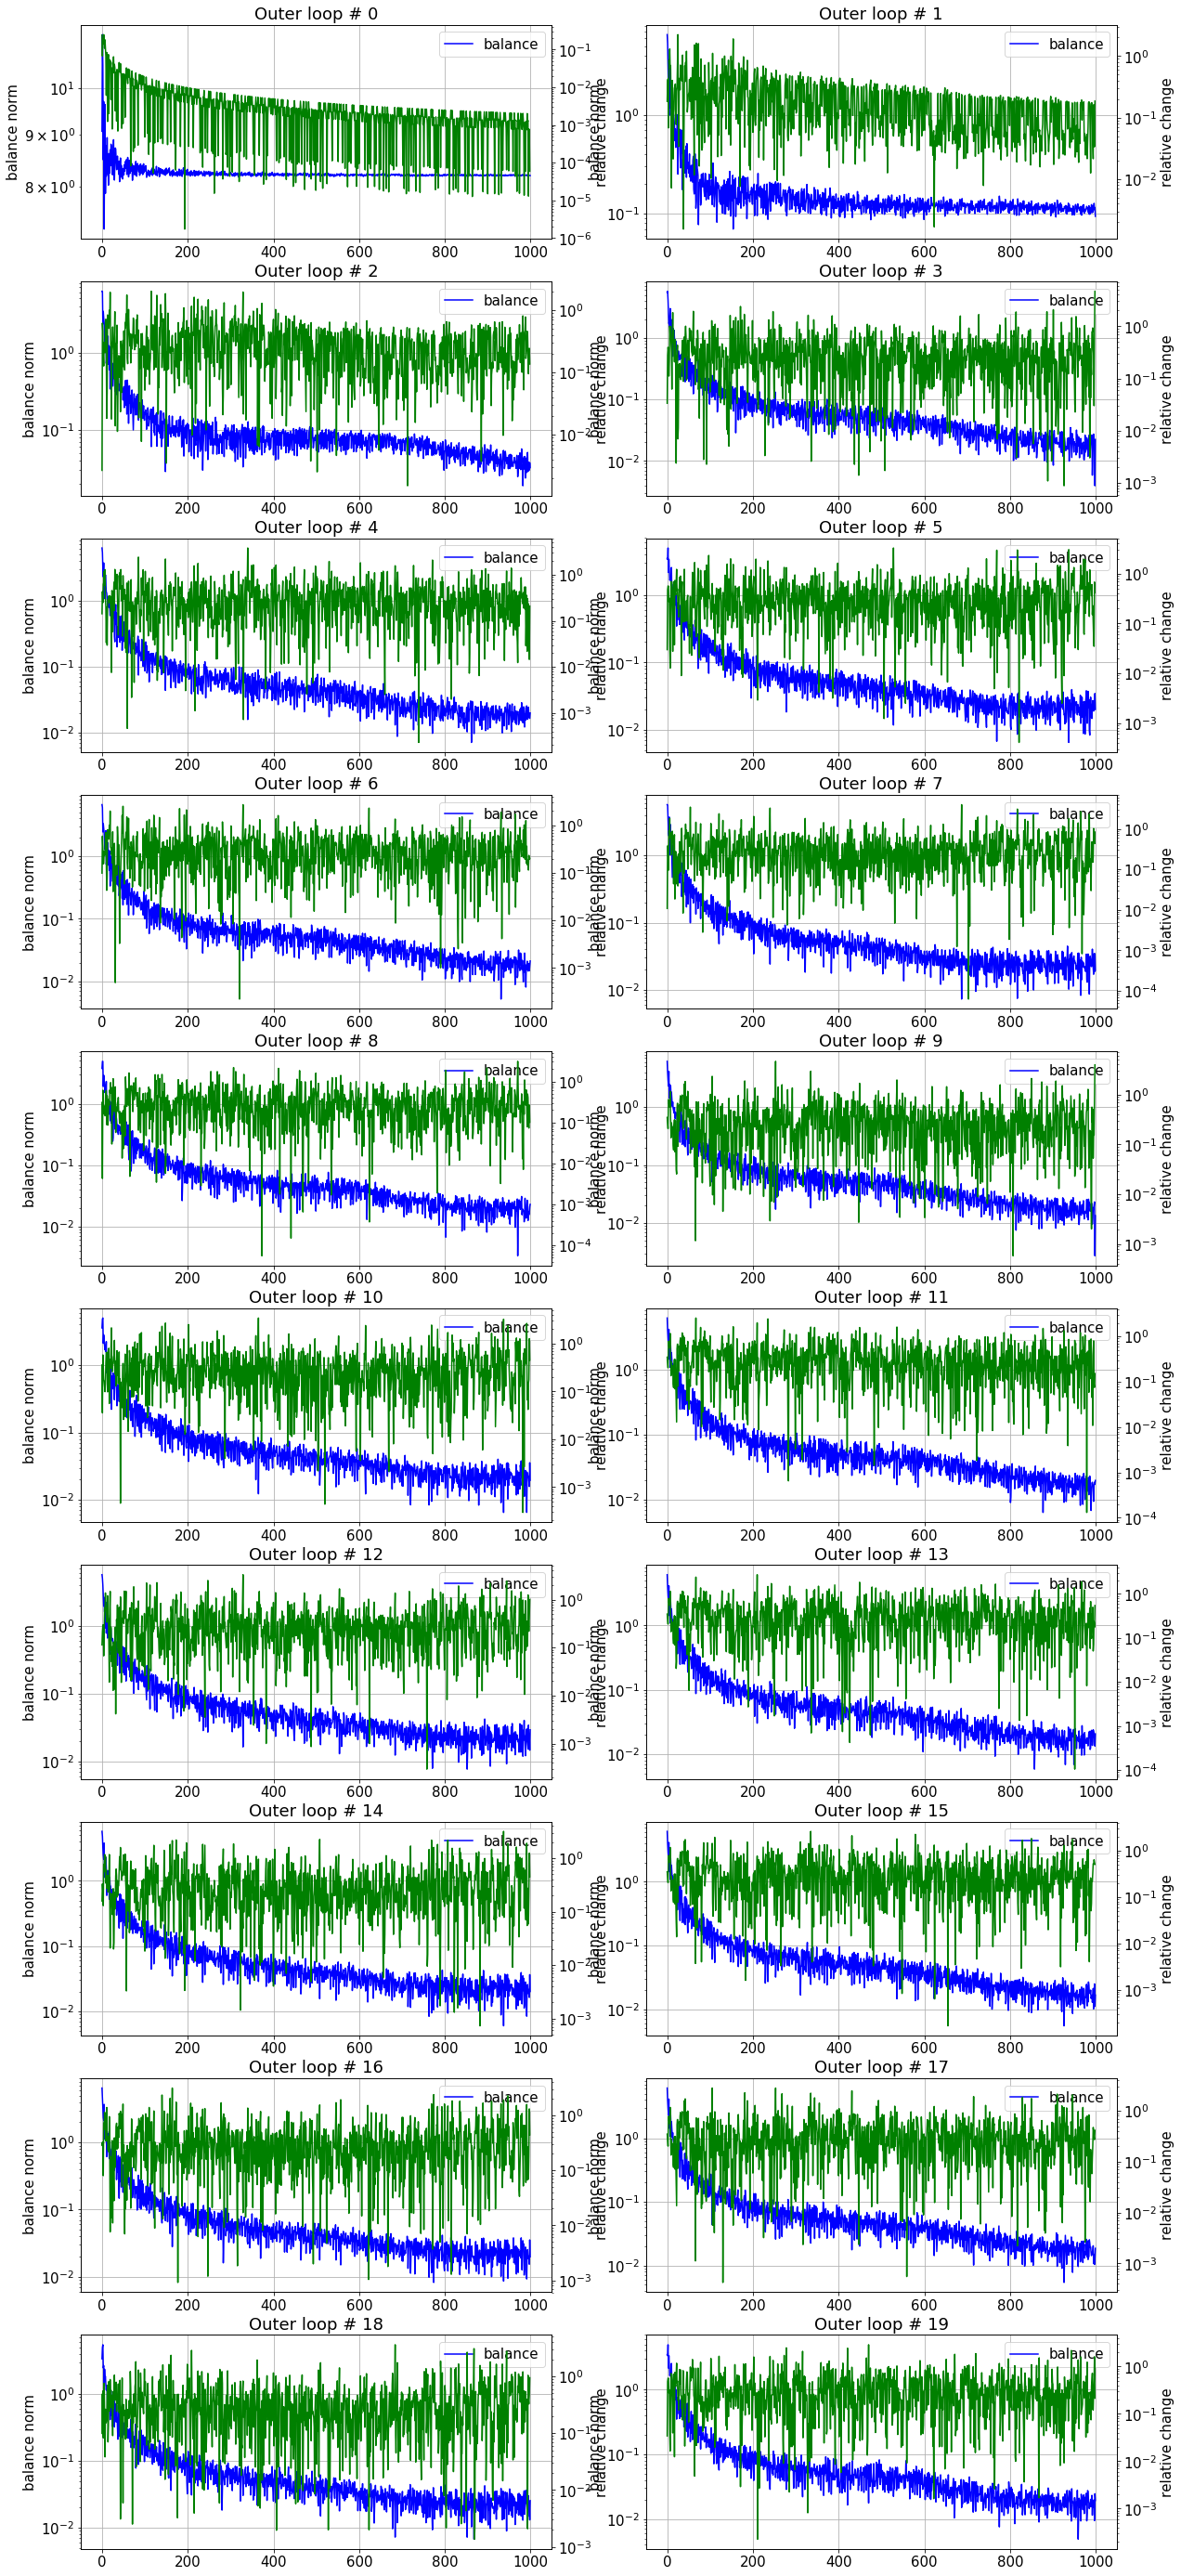

In [18]:
plot_balance_list(balance_list, b_scale='log')

No handles with labels found to put in legend.


Text(0, 0.5, 'Balance Norm')

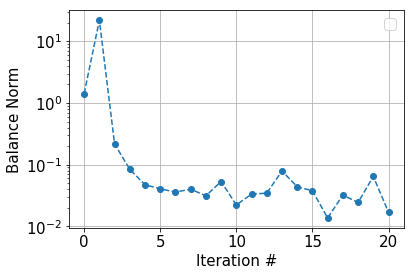

In [12]:
b=np.linalg.norm(balance, axis=1)
plt.plot(np.array(b), 'o--')
plt.grid(True)
plt.legend()
plt.yscale('log')
plt.xticks(np.arange(0, 21, step=5))
plt.xlabel('Iteration #')
plt.ylabel('Balance Norm')

This is the control. We see indeed that the balance gets stuck after 5 or 6 iterations. We can see it in the balance graph because it would decrease more if we let it I think. 

# Updating the FW_tol

## FW_tol == 10**-6

In [13]:
n_nodes=10

In [14]:
path='Data/'+str(n_nodes)+'Nodes/outputs/'+subfolder

In [15]:
print(os.listdir(path))

['initial_setup.pkl', 'output_L_10000_ni_10000_no_100_ev_0_relative_progress_fu_False.pkl']


In [17]:
filename=os.listdir(path)[1]
print(filename)

with open(os.path.join(path, filename), 'rb') as f:
        G_FW, OD, ri_FW, n_outer, n_inner, balance, opt_res, OD_list, balance_list, params = pickle.load(f)

output_L_10000_ni_10000_no_100_ev_0_relative_progress_fu_False.pkl


In [18]:
params

{'L': 10000,
 'ni': 10000,
 'no': 100,
 'ev': False,
 'sc': 'relative_progress',
 'fu': False,
 'ri_smoothing': False,
 'update_factor': False,
 'FW_tol': 1e-06,
 'tol': 0}

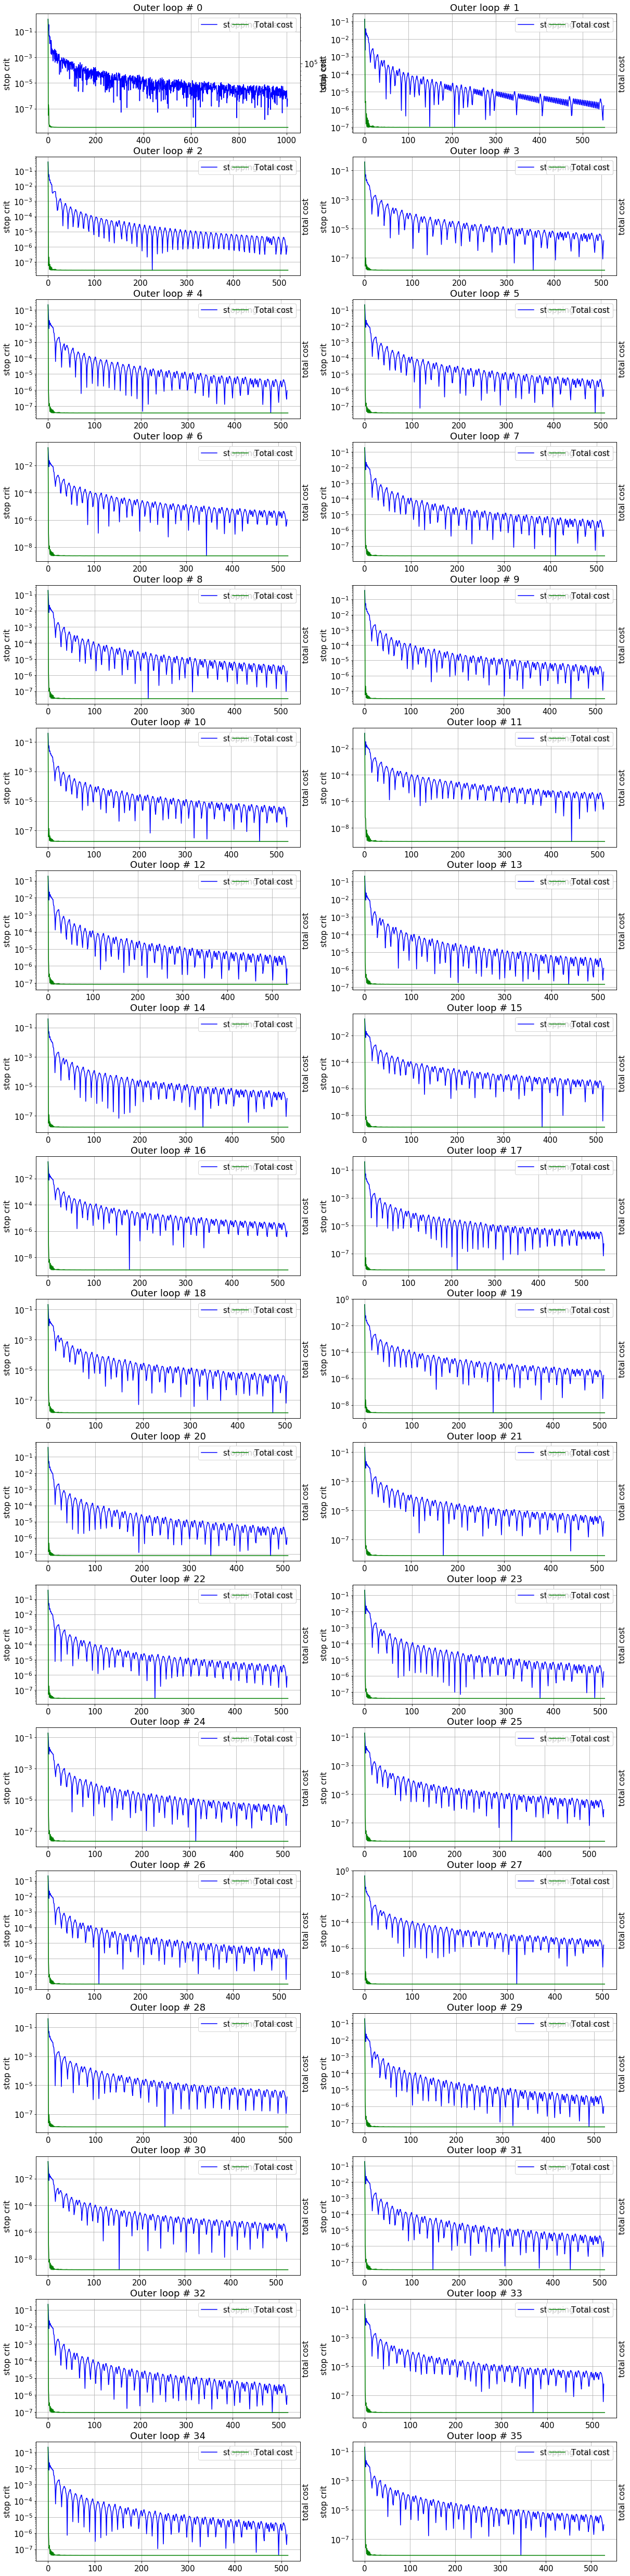

In [19]:
plot_stop_and_cost(opt_res)

We notice a small jump in some ri at 11 but then it keeps being very stable! 

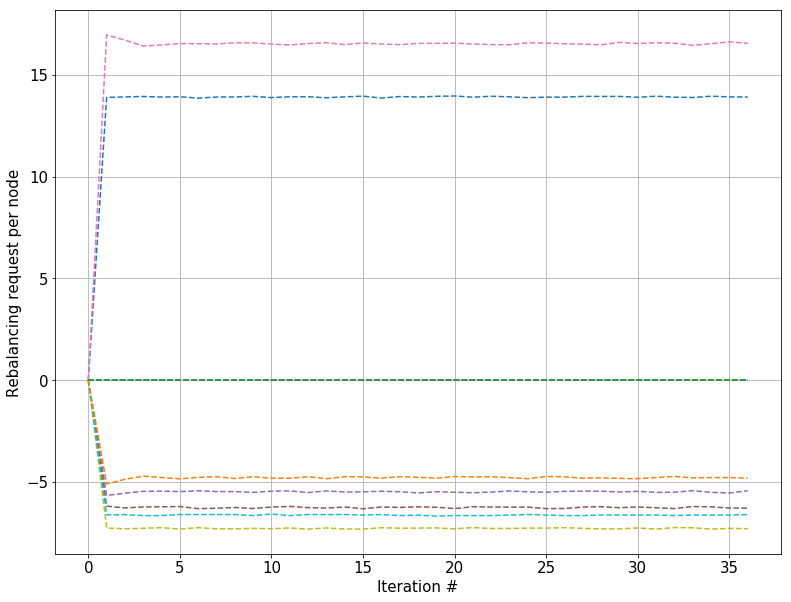

In [21]:
plot_ri_list(ri_FW, save = False, path = None)

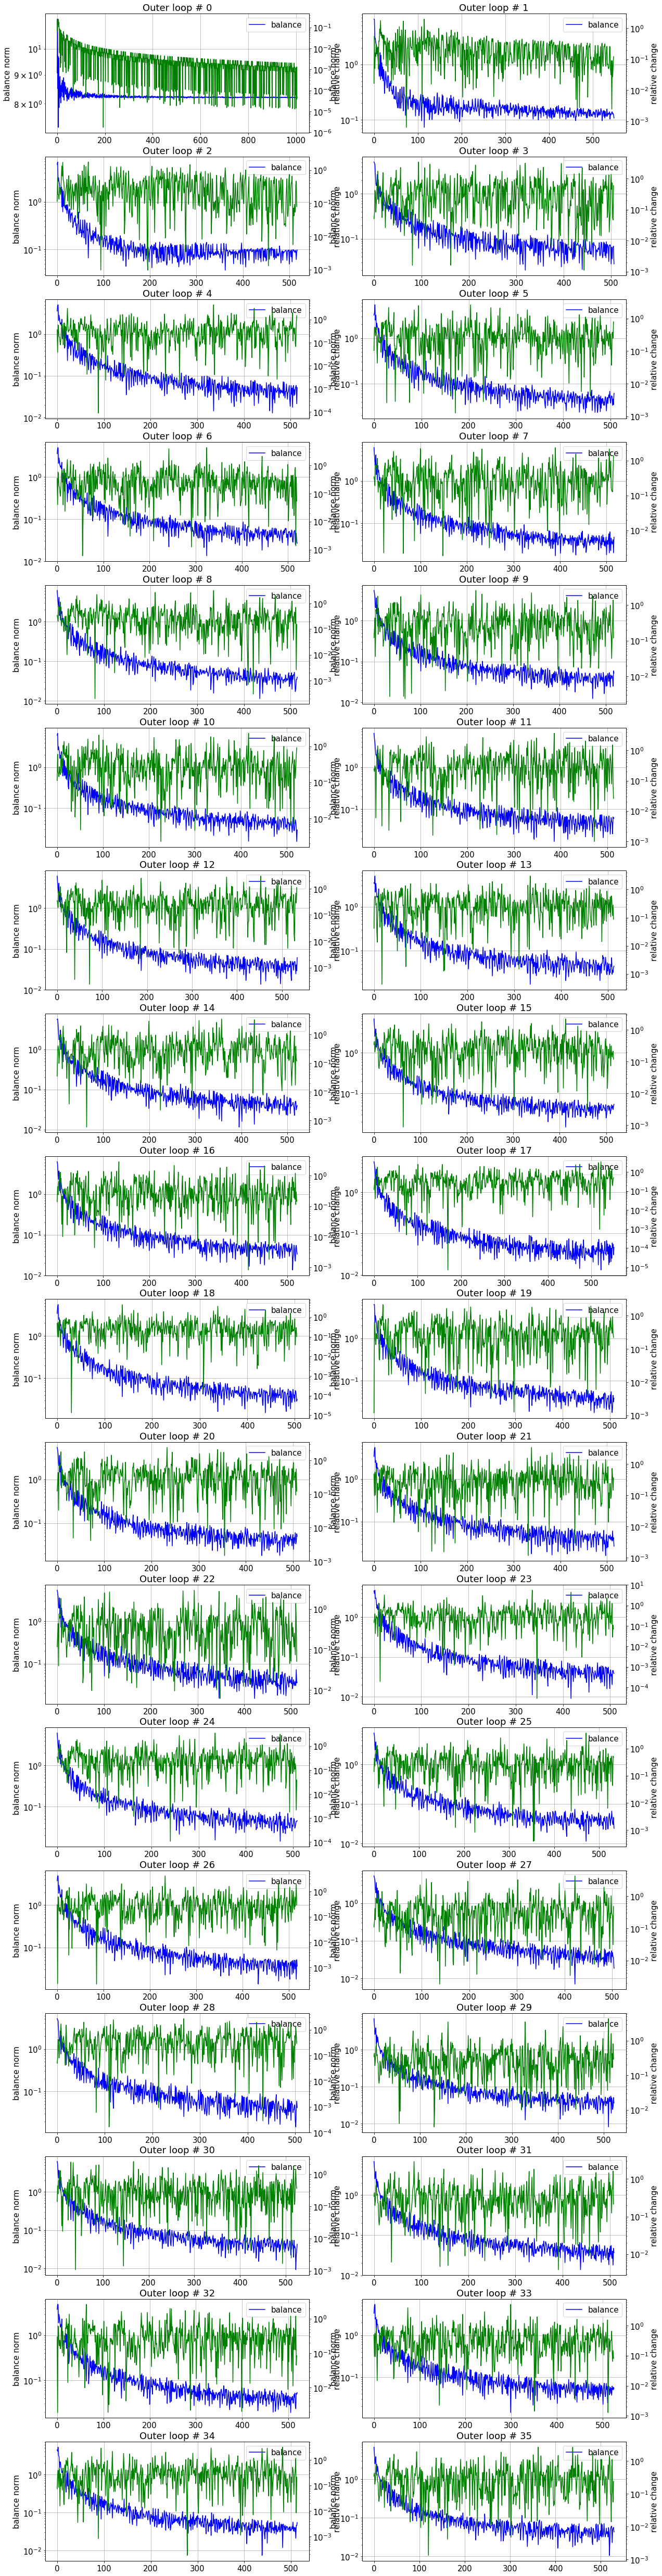

In [22]:
plot_balance_list(balance_list, b_scale='log')

No handles with labels found to put in legend.


Text(0, 0.5, 'Balance Norm')

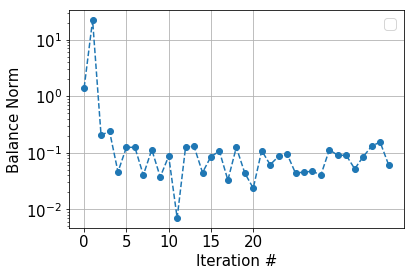

In [23]:
b=np.linalg.norm(balance, axis=1)
plt.plot(np.array(b), 'o--')
plt.grid(True)
plt.legend()
plt.yscale('log')
plt.xticks(np.arange(0, 21, step=5))
plt.xlabel('Iteration #')
plt.ylabel('Balance Norm')